## Clustering & PCA Assignment
- Balakrishna Gadiyar
- 21 Feb 2019

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

 

 
Countries' Data
Data Dictionary
 
## Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. You are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

 
## Results  Expected

    A well-commented Jupyter notebook containing the Clustering Models(both K-means and Hierarchical Clustering) and the final clusters of countries. The clusters must be visualised on both the Principal Components and some of the original variables.  Basically, you need to perform PCA on the dataset in order to obtain the Principal Components, perform Clustering on the countries using a suitable number of components and show the clusters on those components as well as a few selected original variables(the socio-economic factors mentioned above).
    Present the overall approach of the analysis in a presentation 
        Mention the problem statement and the analysis approach.
        Explain the results of Principal Component Analysis and Clustering briefly.
        Include visualisations and summarise the most important results in the presentation.

You need to submit the following  two components

    Python notebook: Should include detailed comments and should not contain unnecessary pieces of code 
    PPT:  Make a PPT to present your analysis to the CEO (and thus you should include both the technical and the business aspects). The PPT should be concise, clear, and to the point. Submit the PPT after converting into the PDF format. The visualisations mentioned above must be present in this file.

 

 

In [628]:
# Import Data analysis,excel reading and visualization related packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd

In [629]:
#Ignore Warnings during python executions
import warnings
warnings.filterwarnings('ignore')

In [630]:
# Importing country and dictionary
country= pd.read_csv('Country-data.csv')
#This step is options, needed but for reference
dictionary = pd.read_csv('data-dictionary.csv')

In [631]:
# Looking at the first five rows of country data
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [632]:
# Let us review what is in the dictionary file - for reference
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [633]:
#Data Analysis - Understand shape of the data frame - Provides number of rows and columns
country.shape
# There are 167 rows and 10 columns

(167, 10)

In [634]:
# Data Analysis - Understand the object types and various columns from dataframe
country.info()
# Income and gdpp are intergers, country is of type object and rest are in float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [635]:
# Data Analysis - Describe the dataframe - statistical insights on data available
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [636]:
#Data Analysis -Understand null values in data frame
country.isnull().sum(axis=0)
#There are no null values in the column. 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [637]:
#Identify rows with null items in dataframe
country.isnull().sum(axis=1).sort_values()

0      0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
105    0
123    0
104    0
102    0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
      ..
74     0
75     0
76     0
77     0
78     0
79     0
80     0
63     0
41     0
62     0
60     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
61     0
166    0
Length: 167, dtype: int64

In [638]:
#Lets check the length of data frame - identify rows 
print(len(country))

167


In [639]:
# Checking the percentage of missing values - no missing values
round(100*(country.isnull().sum()/len(country.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

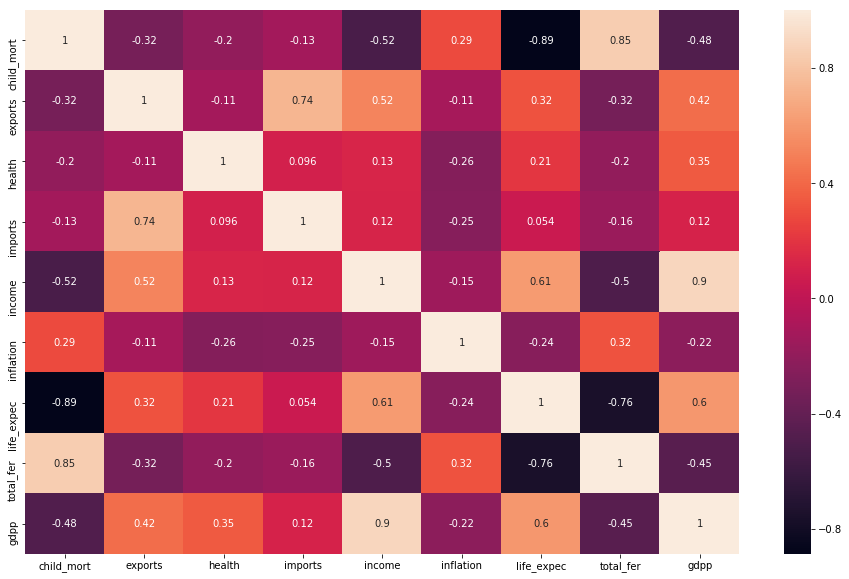

In [640]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(country.corr(),annot = True)
# We can see there are correlations gdp withincome, 
# child mortality with total fertility, 
# life expectancy with gdp
# Imports with exports

In [641]:
# Seperate the country and its features
country_dimensions = ['child_mort', 'exports', 'health', 'imports','income','inflation' ,'life_expec','total_fer','gdpp']

#Dataframe for country dimensions
country_features = country.loc[:, country_dimensions]
country_features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [642]:
# Dataframe for country name
Country_list= country.loc[:,['country']]

In [643]:
#Convert into numpy arrays
country_array=country_features.values
#Visualize country array
country_array

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [644]:
#Calculate covariance matrix - A*A-Transponse
country_covariance_matrix=country_array.T @ country_array
#Visualize covariance matrix generated
country_covariance_matrix

array([[5.14573950e+05, 2.04357490e+05, 3.98745570e+04, 2.79062524e+05,
        4.19058464e+07, 7.01348108e+04, 3.98139090e+05, 2.74397260e+04,
        2.35855286e+07],
       [2.04357490e+05, 4.06956739e+05, 4.53610461e+04, 4.03142860e+05,
        1.63035402e+08, 4.82628746e+04, 4.97179202e+05, 1.80339346e+04,
        1.23924335e+08],
       [3.98745570e+04, 4.53610461e+04, 9.01024240e+03, 5.44279938e+04,
        2.06534645e+07, 7.62653176e+03, 8.11622660e+04, 3.21967220e+03,
        1.76474445e+07],
       [2.79062524e+05, 4.03142860e+05, 5.44279938e+04, 4.64474904e+05,
        1.43737696e+08, 5.04442520e+04, 5.54441932e+05, 2.21168968e+04,
        1.10025480e+08],
       [4.19058464e+07, 1.63035402e+08, 2.06534645e+07, 1.43737696e+08,
        1.10780925e+11, 1.72823741e+07, 2.19428624e+08, 6.00931082e+06,
        8.96480309e+10],
       [7.01348108e+04, 4.82628746e+04, 7.62653176e+03, 5.04442520e+04,
        1.72823741e+07, 2.86618084e+04, 8.79511358e+04, 4.67294430e+03,
        9.7

In [645]:
#Let us do eigen decomposition of the covariance matrix
np.linalg.eig(country_covariance_matrix)

(array([1.87963081e+11, 6.65260834e+09, 1.03327546e+06, 2.01915598e+05,
        8.88861334e+04, 2.24332357e+04, 1.19667056e+04, 1.03425219e+02,
        7.13876413e+02]),
 array([[ 2.50831759e-04,  1.42343122e-03,  5.98081282e-01,
          7.48305494e-01, -2.70127785e-01,  3.87771709e-02,
         -8.18451925e-02, -3.39212798e-02, -3.68791247e-03],
        [ 1.08749581e-03,  1.87282758e-03,  3.04674782e-01,
         -4.23764717e-01, -4.67716466e-01, -5.93145158e-01,
         -3.89225049e-01,  1.26222344e-03,  7.42593354e-02],
        [ 1.44528920e-04,  1.52840786e-05,  5.96081698e-02,
         -1.39937343e-02,  7.61938887e-02,  7.68671319e-02,
          4.23580737e-02,  1.34187680e-02,  9.91243000e-01],
        [ 9.61447024e-04,  1.56359599e-03,  4.54358343e-01,
         -4.61773617e-01, -3.28123369e-01,  5.28266407e-01,
          4.34677446e-01, -2.07351313e-04, -6.81570659e-02],
        [ 7.57832441e-01,  6.52437369e-01, -3.63015323e-03,
          1.31901098e-03, -2.05598611e-04,  6.

In [646]:
#Applying SVD 
Country_U,Country_S,Country_VT = np.linalg.svd(country_array,full_matrices=0)

In [647]:
#Viewing U
Country_U

array([[-0.00364683, -0.0077448 , -0.10443446, ..., -0.06279426,
         0.00490595, -0.12981105],
       [-0.02351296, -0.04143385, -0.0544062 , ..., -0.01813329,
        -0.03938238,  0.07163213],
       [-0.02926128, -0.06175367, -0.0470183 , ...,  0.00715295,
        -0.05058115, -0.00265176],
       ...,
       [-0.00982049, -0.02375018, -0.09986354, ..., -0.03081851,
         0.02233723,  0.06420044],
       [-0.0098028 , -0.02366885, -0.08400858, ..., -0.06455689,
        -0.02662249, -0.08792397],
       [-0.00793093, -0.01267626, -0.09532674, ...,  0.04138817,
         0.06766505, -0.1206451 ]])

In [648]:
#Viewing S
Country_S

array([4.33547092e+05, 8.15635234e+04, 1.01650158e+03, 4.49350195e+02,
       2.98137776e+02, 1.49777287e+02, 1.09392439e+02, 2.67184658e+01,
       1.01698190e+01])

In [649]:
#Viewing VT
Country_VT


array([[-2.50831759e-04, -1.08749581e-03, -1.44528920e-04,
        -9.61447024e-04, -7.57832441e-01, -1.03418990e-04,
        -1.47130086e-03, -3.91099845e-05, -6.52445878e-01],
       [-1.42343122e-03, -1.87282758e-03, -1.52840786e-05,
        -1.56359599e-03, -6.52437369e-01, -5.87778767e-04,
        -2.26985596e-03, -1.01012013e-04,  7.57833751e-01],
       [-5.98081282e-01, -3.04674782e-01, -5.96081698e-02,
        -4.54358343e-01,  3.63015323e-03, -8.21201539e-02,
        -5.75755112e-01, -3.49910571e-02, -1.48253017e-03],
       [ 7.48305494e-01, -4.23764717e-01, -1.39937343e-02,
        -4.61773617e-01,  1.31901098e-03,  8.08137727e-02,
        -2.00061107e-01,  2.17853708e-02,  7.18528398e-06],
       [-2.70127785e-01, -4.67716466e-01,  7.61938887e-02,
        -3.28123369e-01, -2.05598611e-04,  8.22020281e-02,
         7.66761365e-01,  1.10273683e-02, -1.53886402e-04],
       [-3.87771708e-02,  5.93145158e-01, -7.68671319e-02,
        -5.28266407e-01, -6.84145353e-04,  5.977901

In [650]:
#Transposing VT vector
Country_VT_Transpose=np.transpose(Country_VT)

In [651]:
#Get the transpose of VT value
Country_VT.T

array([[-2.50831759e-04, -1.42343122e-03, -5.98081282e-01,
         7.48305494e-01, -2.70127785e-01, -3.87771708e-02,
         8.18451925e-02, -3.68791247e-03,  3.39212798e-02],
       [-1.08749581e-03, -1.87282758e-03, -3.04674782e-01,
        -4.23764717e-01, -4.67716466e-01,  5.93145158e-01,
         3.89225049e-01,  7.42593354e-02, -1.26222344e-03],
       [-1.44528920e-04, -1.52840786e-05, -5.96081698e-02,
        -1.39937343e-02,  7.61938887e-02, -7.68671319e-02,
        -4.23580737e-02,  9.91243000e-01, -1.34187680e-02],
       [-9.61447024e-04, -1.56359599e-03, -4.54358343e-01,
        -4.61773617e-01, -3.28123369e-01, -5.28266407e-01,
        -4.34677446e-01, -6.81570659e-02,  2.07351314e-04],
       [-7.57832441e-01, -6.52437369e-01,  3.63015323e-03,
         1.31901098e-03, -2.05598611e-04, -6.84145353e-04,
        -1.97039351e-04,  7.05483965e-05, -1.07555234e-05],
       [-1.03418990e-04, -5.87778767e-04, -8.21201539e-02,
         8.08137727e-02,  8.22020281e-02,  5.977901

In [652]:
#Conduct Matrix Multiplication
np.matmul(country_array,Country_VT_Transpose)

array([[-1.58107446e+03, -6.31693245e+02, -1.06157791e+02, ...,
        -6.86921748e+00,  1.31079538e-01, -1.32015492e+00],
       [-1.01939749e+04, -3.37949118e+03, -5.53039888e+01, ...,
        -1.98364440e+00, -1.05223677e+00,  7.28485833e-01],
       [-1.26861408e+04, -5.03684686e+03, -4.77941813e+01, ...,
         7.82478137e-01, -1.35145084e+00, -2.69679199e-02],
       ...,
       [-4.25764288e+03, -1.93714832e+03, -1.01511449e+02, ...,
        -3.37131224e+00,  5.96816618e-01,  6.52906825e-01],
       [-4.24997594e+03, -1.93051495e+03, -8.53948590e+01, ...,
        -7.06203594e+00, -7.11312083e-01, -8.94170834e-01],
       [-3.43843120e+03, -1.03392009e+03, -9.68997776e+01, ...,
         4.52755333e+00,  1.80790625e+00, -1.22693879e+00]])

In [653]:
#Import PCA package
from sklearn.decomposition import PCA

In [654]:
#define random number for iteration and initiate pca
country_pca = PCA(svd_solver='randomized', random_state=100)

#fit the country array
country_pca.fit(country_array)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [655]:
#View the components from PCA
country_pca.components_

array([[-8.07327698e-04,  5.11348092e-04,  2.52724061e-05,
         1.14384869e-04,  7.26746756e-01, -7.65998651e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707964e-04, -2.15627987e-04,
         5.41883715e-05,  6.86903991e-01,  2.85616792e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25215339e-01, -2.28627282e-01, -9.25844014e-03,
        -2.42704100e-01,  1.17358496e-03,  8.73842384e-02,
        -1.55747044e-01,  2.86462224e-02,  1.16146666e-04],
       [ 3.28783999e-01,  6.52814366e-01, -7.58649598e-03,
         6.78156522e-01, -4.12812338e-04, -2.19844970e-02,
        -7.23212922e-02,  8.16973465e-03,  2.44967157e-04],
       [-3.94786565e-02,  5.94987240e-01, -7.77516009e-02,
        -5.29179120e-01, -6.84017169e-04,  5.95872597e-01,
         5.69356462e-02,  7.02425075e-03,  3.74367532e-04],
       [-6.08330796e-02, -4.01990656e-01,  5.54312529e-02,
         4.41412073e-01,  1.95004065e-04,  7.978499

In [656]:
#Show variance ratio from the pca
country_pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

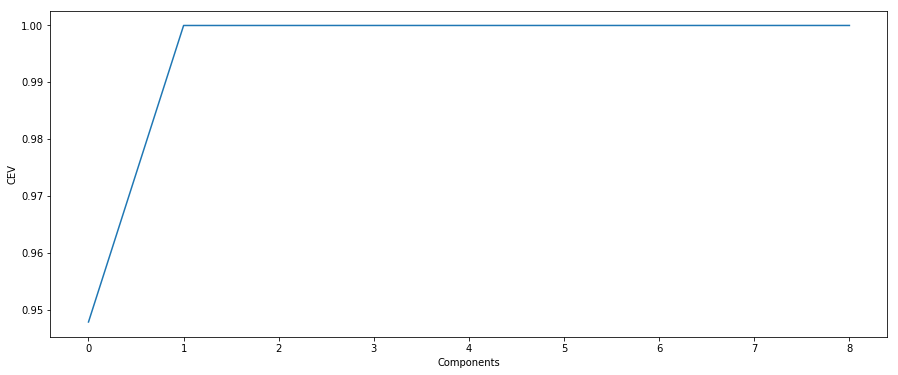

In [657]:
#Plot the graph depicting number of components and cumulative variance
%matplotlib inline
fig = plt.figure(figsize =(15,6))
plt.plot(np.cumsum(country_pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('CEV')
plt.show()

In [658]:
#Scale country dataframe
from sklearn.preprocessing import StandardScaler
country_array_scaled = StandardScaler().fit_transform(country_array)
country_array_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [659]:
#Considering 5 components 
country_pca2 = PCA(n_components=5)

#Applying transformation
Country_PCs = country_pca2.fit_transform(country_array_scaled)

#Principal Component Dataframe
Country_PCs_Dataframe = pd.DataFrame(data = Country_PCs
             , columns = ['Country_PC1', 'Country_PC2','Country_PC3','Country_PC4','Country_PC5'])
#Display newly generated frame
Country_PCs_Dataframe

,Country_PC1,Country_PC2,Country_PC3,Country_PC4,Country_PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
5,0.022407,-1.779187,0.869997,-0.036967,0.981057
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992
7,2.342165,-1.988459,0.190344,1.105038,-0.731192
8,2.973764,-0.734689,-0.519766,1.205442,0.083580
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350


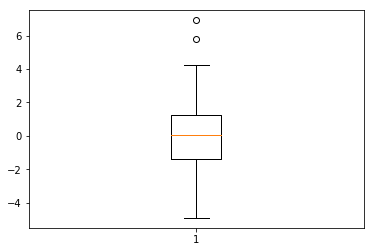

In [660]:
# outlier treatment for Country_PC1
plt.boxplot(Country_PCs_Dataframe.Country_PC1)
Q1 = Country_PCs_Dataframe.Country_PC1.quantile(0.25)
Q3 = Country_PCs_Dataframe.Country_PC1.quantile(0.75)
IQR = Q3 - Q1
Country_PCs_Dataframe = Country_PCs_Dataframe[(Country_PCs_Dataframe.Country_PC1 >= Q1 - 1.5*IQR) & (Country_PCs_Dataframe.Country_PC1 <= Q3 + 1.5*IQR)]

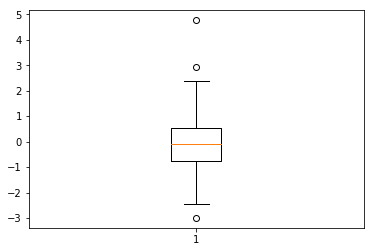

In [661]:
# outlier treatment for Country_PC2
plt.boxplot(Country_PCs_Dataframe.Country_PC2)
Q1 = Country_PCs_Dataframe.Country_PC2.quantile(0.25)
Q3 = Country_PCs_Dataframe.Country_PC2.quantile(0.75)
IQR = Q3 - Q1
Country_PCs_Dataframe = Country_PCs_Dataframe[(Country_PCs_Dataframe.Country_PC2 >= Q1 - 1.5*IQR) & (Country_PCs_Dataframe.Country_PC2 <= Q3 + 1.5*IQR)]

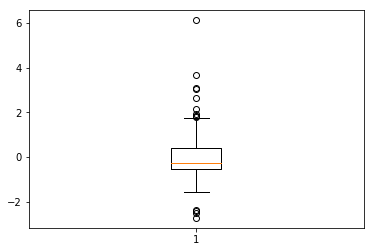

In [662]:
# outlier treatment for Country_PC3
plt.boxplot(Country_PCs_Dataframe.Country_PC3)
Q1 = Country_PCs_Dataframe.Country_PC3.quantile(0.25)
Q3 = Country_PCs_Dataframe.Country_PC3.quantile(0.75)
IQR = Q3 - Q1
Country_PCs_Dataframe = Country_PCs_Dataframe[(Country_PCs_Dataframe.Country_PC3 >= Q1 - 1.5*IQR) & (Country_PCs_Dataframe.Country_PC3 <= Q3 + 1.5*IQR)]

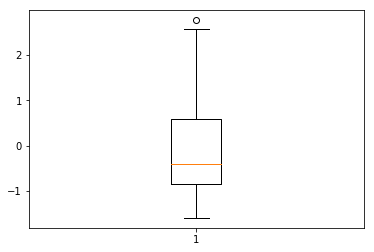

In [663]:
# outlier treatment for Country_PC4
plt.boxplot(Country_PCs_Dataframe.Country_PC4)
Q1 = Country_PCs_Dataframe.Country_PC4.quantile(0.25)
Q3 = Country_PCs_Dataframe.Country_PC4.quantile(0.75)
IQR = Q3 - Q1
Country_PCs_Dataframe = Country_PCs_Dataframe[(Country_PCs_Dataframe.Country_PC4 >= Q1 - 1.5*IQR) & (Country_PCs_Dataframe.Country_PC4 <= Q3 + 1.5*IQR)]

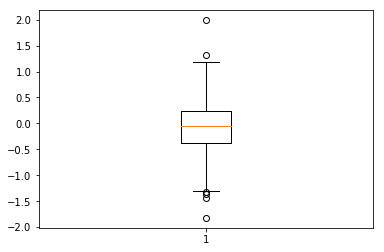

In [664]:
# outlier treatment for Country_P5C5
plt.boxplot(Country_PCs_Dataframe.Country_PC5)
Q1 = Country_PCs_Dataframe.Country_PC1.quantile(0.25)
Q3 = Country_PCs_Dataframe.Country_PC1.quantile(0.75)
IQR = Q3 - Q1
Country_PCs_Dataframe = Country_PCs_Dataframe[(Country_PCs_Dataframe.Country_PC5 >= Q1 - 1.5*IQR) & (Country_PCs_Dataframe.Country_PC5 <= Q3 + 1.5*IQR)]

In [665]:
#Viewing Country List before merging
Country_list.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [666]:
#Map on the origial dataframe
Country_Master_DF = pd.concat([Country_PCs_Dataframe, Country_list], axis = 1)

#Show merged dataframe
Country_Master_DF.head(5)

,Country_PC1,Country_PC2,Country_PC3,Country_PC4,Country_PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


In [667]:
#Explained variance shows 86% is covered by 5 Principal components
country_pca2.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

In [668]:
#Importing K-Means algorithms and Hierarchical Clustering 
# KMeans clustering 
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [669]:
# Reusing the hopkins stats function from examples given during clustering sessions from upgrad

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [670]:
#Hopkins statistical evaluation - We see higher percentage hence clustering is needed.
hopkins(Country_PCs_Dataframe)

0.7178981523966211

In [671]:
# Kmeans with K=5, considering 5 principal commponents.
country_kmodel = KMeans(n_clusters = 5, max_iter=50)
country_kmodel.fit(Country_PCs_Dataframe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [672]:
# Trying to obtain silhouette score, 
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(Country_PCs_Dataframe)
    sse_.append([k, silhouette_score(Country_PCs_Dataframe, kmeans.labels_)])

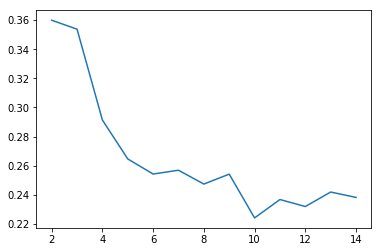

In [673]:
#Plot the graph to identify the componets to consider
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

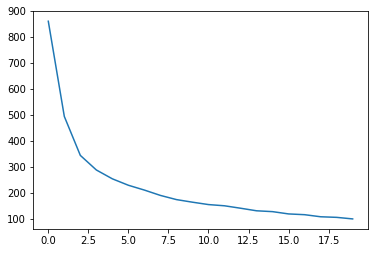

In [674]:
#sum of squared distances - Post 3rd cluster variations have reduced.. 
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(Country_PCs_Dataframe)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [675]:
# analysis of clusters formed
Country_Master_DF.index = pd.RangeIndex(len(Country_Master_DF.index))
country_km = pd.concat([Country_Master_DF, pd.Series(model_clus.labels_)], axis=1)
country_km.columns = ['Country_PC1','Country_PC2','Country_PC3', 'Country_PC4','Country_PC5','country', 'Cluster']

country_km_pc1_mean = 	pd.DataFrame(country_km.groupby(["Cluster"]).Country_PC1.mean())
country_km_pc2_mean = 	pd.DataFrame(country_km.groupby(["Cluster"]).Country_PC2.mean())
country_km_pc3_mean = 	pd.DataFrame(country_km.groupby(["Cluster"]).Country_PC3.mean())
country_km_pc4_mean = 	pd.DataFrame(country_km.groupby(["Cluster"]).Country_PC4.mean())
country_km_pc5_mean = 	pd.DataFrame(country_km.groupby(["Cluster"]).Country_PC5.mean())

In [676]:
country_k_plot_df = pd.concat([pd.Series([0,1,2,3,4,5]), country_km_pc1_mean, country_km_pc2_mean, country_km_pc3_mean,country_km_pc4_mean,country_km_pc5_mean], axis=1)
country_k_plot_df.columns = ["Cluster", "pc1_mean", "pc2_mean", "pc3_mean","pc4_mean", "pc5_mean"]
country_k_plot_df.head()

,Cluster,pc1_mean,pc2_mean,pc3_mean,pc4_mean,pc5_mean
Cluster,,,,,,
0.0,0.0,1.347499,-0.084774,-0.001394,-0.243944,0.209189
1.0,1.0,-1.893924,0.075615,-0.225365,0.319383,-0.287564
2.0,2.0,0.569169,-0.141162,-0.197015,-0.500510,0.042359
3.0,3.0,-1.007011,0.307644,-0.758937,-0.095087,-0.143222
4.0,4.0,0.231772,0.630921,-0.147438,-0.629284,0.182760


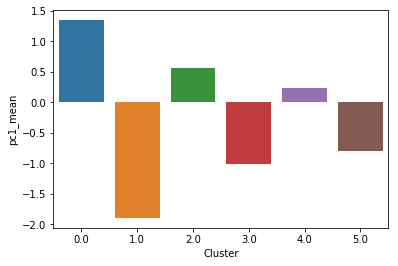

In [677]:
#Bar plot against 1st principal component mean
sns.barplot(x=country_k_plot_df.Cluster, y=country_k_plot_df.pc1_mean)

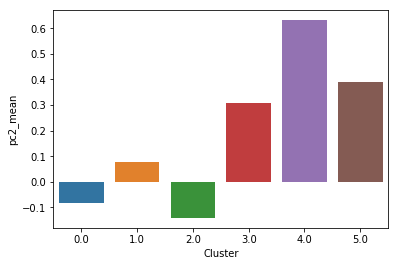

In [678]:
#Bar plot against 2nd principal component mean
sns.barplot(x=country_k_plot_df.Cluster, y=country_k_plot_df.pc2_mean)

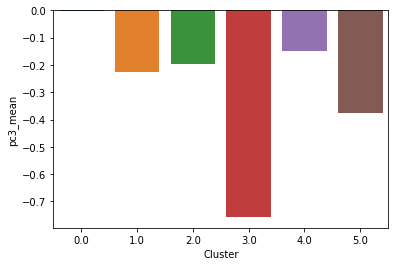

In [679]:
#Bar plot against 3rd principal component mean
sns.barplot(x=country_k_plot_df.Cluster, y=country_k_plot_df.pc3_mean)

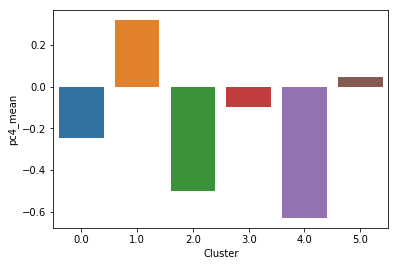

In [680]:
#Bar plot against 4th principal component mean
sns.barplot(x=country_k_plot_df.Cluster, y=country_k_plot_df.pc4_mean)

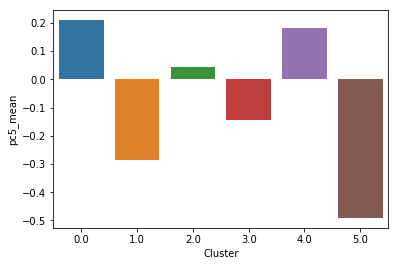

In [681]:
#Bar plot against 5th principal component mean
sns.barplot(x=country_k_plot_df.Cluster, y=country_k_plot_df.pc5_mean)

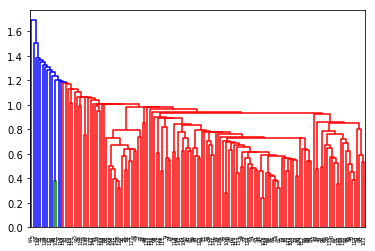

In [682]:
# Reviewing through hierarchical method - Single
mergings = linkage(Country_PCs_Dataframe, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

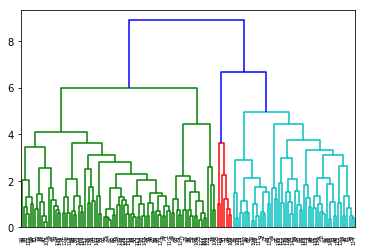

In [683]:
# Reviewing through hierarchical method - Single
mergings = linkage(Country_PCs_Dataframe, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [684]:
#Hierarchical approach
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
Country_hc = pd.concat([Country_PCs_Dataframe, clusterCut], axis=1)
Country_hc.columns = ['Country_PC1','Country_PC2','Country_PC3', 'Country_PC4','Country_PC5','Cluster']

In [685]:
Country_hc_pc1_mean = 	pd.DataFrame(Country_hc.groupby(["Cluster"]).Country_PC1.mean())
Country_hc_pc2_mean = 	pd.DataFrame(Country_hc.groupby(["Cluster"]).Country_PC2.mean())
Country_hc_pc3_mean = 	pd.DataFrame(Country_hc.groupby(["Cluster"]).Country_PC3.mean())
Country_hc_pc4_mean = 	pd.DataFrame(Country_hc.groupby(["Cluster"]).Country_PC4.mean())
Country_hc_pc5_mean = 	pd.DataFrame(Country_hc.groupby(["Cluster"]).Country_PC5.mean())

country_h_plot_df = pd.concat([pd.Series([0,1,2,3,4,5]), Country_hc_pc1_mean, Country_hc_pc2_mean, Country_hc_pc3_mean,Country_hc_pc4_mean,Country_hc_pc5_mean], axis=1)
country_h_plot_df.columns = ["Cluster", "pc1_mean", "pc2_mean", "pc3_mean","pc4_mean", "pc5_mean"]
country_h_plot_df.head()

,Cluster,pc1_mean,pc2_mean,pc3_mean,pc4_mean,pc5_mean
0,0,-0.538048,-0.150468,-0.180681,-0.000492,-0.040240
1,1,0.100755,-0.078777,-0.107596,-0.227713,0.002617
2,2,-0.163492,-0.580352,0.162680,-0.249732,-0.250521
3,3,0.629168,-0.166264,-0.237811,0.117393,-0.140617
4,4,-1.502494,0.156799,-0.462411,0.026253,-0.363293


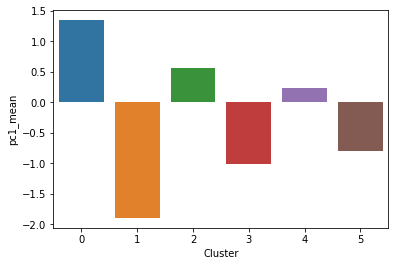

In [686]:
#Bar plot against 1st principal component mean
sns.barplot(x=country_h_plot_df.Cluster, y=country_k_plot_df.pc1_mean)

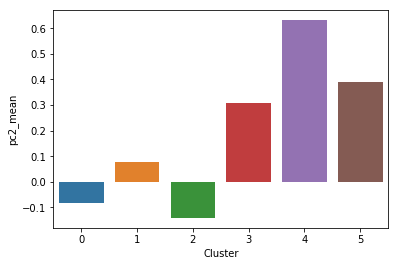

In [687]:
#Bar plot against 2nd principal component mean
sns.barplot(x=country_h_plot_df.Cluster, y=country_k_plot_df.pc2_mean)

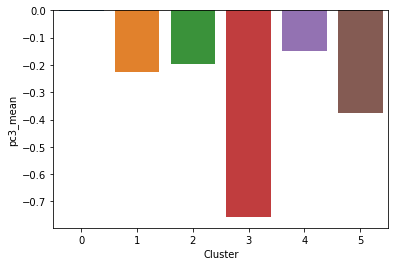

In [688]:
#Bar plot against 3rd principal component mean
sns.barplot(x=country_h_plot_df.Cluster, y=country_k_plot_df.pc3_mean)

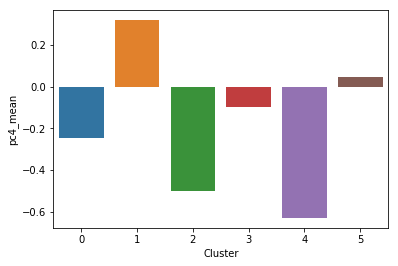

In [689]:
#Bar plot against 4th principal component mean
sns.barplot(x=country_h_plot_df.Cluster, y=country_k_plot_df.pc4_mean)

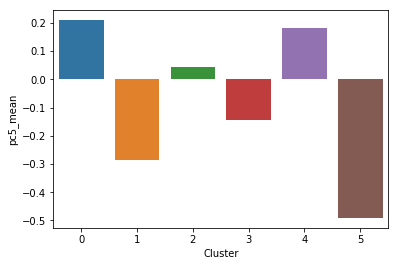

In [690]:
#Bar plot against 5th principal component mean
sns.barplot(x=country_h_plot_df.Cluster, y=country_k_plot_df.pc5_mean)

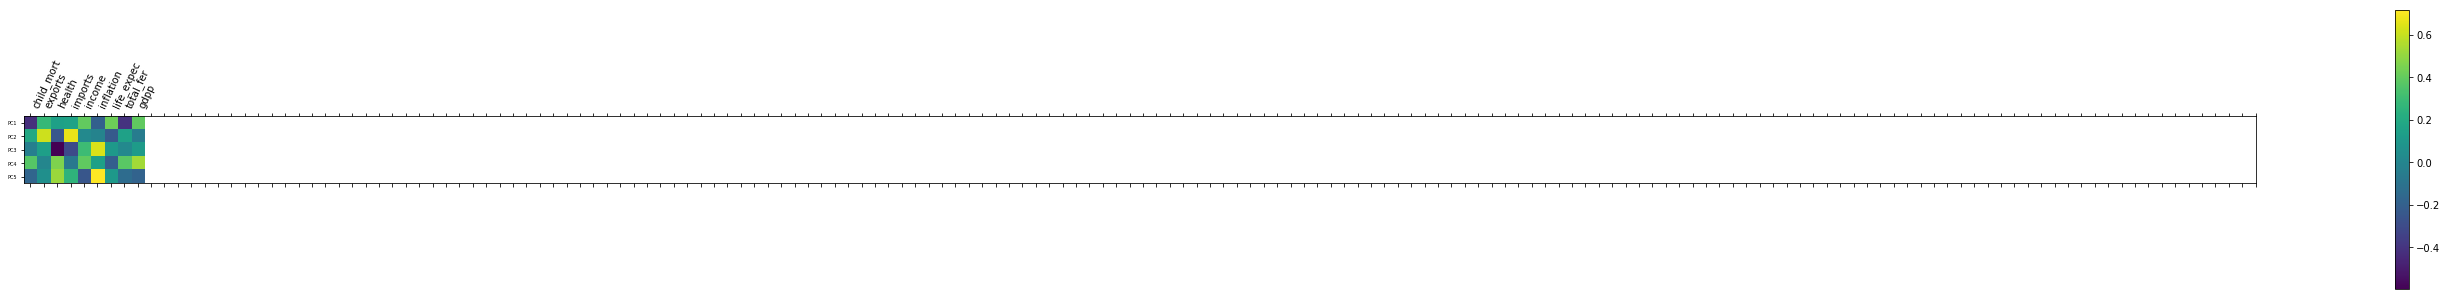

In [691]:
#Mat plot to depict principal components vs original feature value share.
plt.figure(figsize=(50,5))
plt.matshow(country_pca2.components_,cmap='viridis', fignum=1)
plt.yticks([0,1,2,3,4],['PC1','PC2','PC3','PC4','PC5'],fontsize=5)
plt.colorbar()
plt.xticks(range(len(country_features)),country_features,rotation=65,ha='left')
plt.show()

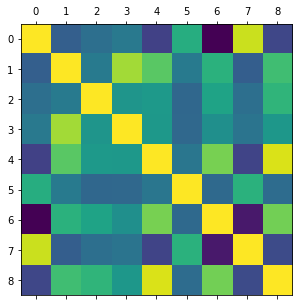

In [692]:
#Matplot on original features
fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(country.corr())

In [693]:
#Examining % values per each column
country_column_fill= country.count(0)/country.shape[0] * 100
country_column_fill

country       100.0
child_mort    100.0
exports       100.0
health        100.0
imports       100.0
income        100.0
inflation     100.0
life_expec    100.0
total_fer     100.0
gdpp          100.0
dtype: float64

In [694]:
# Conclusion - PC1 has the highest contribution to correlation features (GDP, Life Expectancy, Income)
# We will now consider 3 cluster segmentation (Rich,Developing,Poor) based on above parameters and use Kmeans to analyze further.
coutry_km_plus = KMeans(3, init='k-means++', random_state = 167)
coutry_km_plus.fit(country_features.values)
country['Segment'] = coutry_km_plus.predict(country_features.values)
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Segment
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [695]:
# Segment or cluster analysis - GDP
country.groupby('Segment').gdpp.mean()
#This derives 3 clear clusters, 0 - Poor, 2- Developing, 1- Rich

Segment
0     4438.390625
1    65442.857143
2    35587.500000
Name: gdpp, dtype: float64

In [696]:
# Segment or cluster analysis - income
country.groupby('Segment').income.mean()
#Clearly co-relates to gdp,segmentation logic still hold -  0 - Poor, 2- Developing, 1- Rich

Segment
0     8569.242188
1    80342.857143
2    37621.875000
Name: income, dtype: float64

In [697]:
# Segment or cluster analysis - life_expec
country.groupby('Segment').life_expec.mean()
#Clearly co-relates to gdp/income,segmentation logic still hold -  0 - Poor, 2- Developing, 1- Rich

Segment
0    67.873437
1    80.285714
2    79.156250
Name: life_expec, dtype: float64

In [698]:
# Segment or cluster analysis - child_mort (To see if there is any relation with other principal components)
country.groupby('Segment').child_mort.mean()
#clearly highlights poor countries have higher infant mortality compared to rich and devoloping.

Segment
0    47.389844
1     6.228571
2     8.800000
Name: child_mort, dtype: float64

In [699]:
# Map related value on to the dataframe for graphical representation
Segment_Name = {0:'Poor',1:'Rich', 2:'Developing'}
country['Segment_Name'] = country.Segment.map(Segment_Name)
country.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Segment,Segment_Name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,Poor
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0,Poor
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,Poor
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,Poor
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,Poor
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0,Poor
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,Poor
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,Developing
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,Developing
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0,Poor


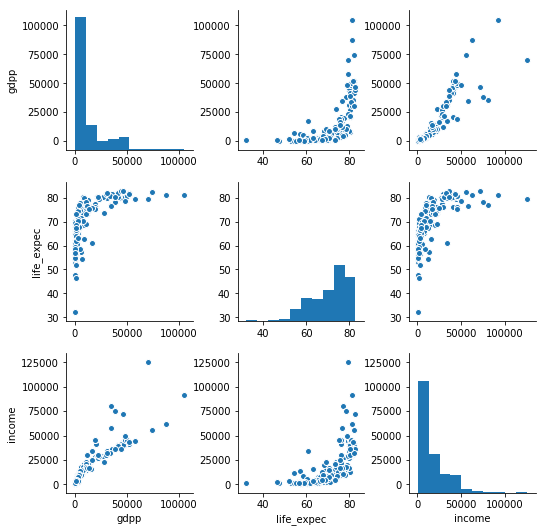

In [700]:
#Visualize the dataframe to identify any patters - PC1 has better distribution 
sns.pairplot(country[['gdpp','life_expec', 'income']])
plt.show()

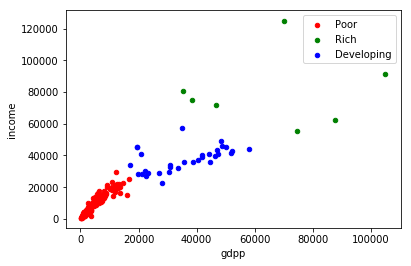

In [701]:
#Visualization on newly created segments - income vs gdp
segment_color={'Poor':'r','Rich':'g','Developing':'b'}
fig, ax = plt.subplots()
for clust in Segment_Name.values():
    color = segment_color[clust]
    country[country.Segment_Name == clust].plot(kind='scatter',x='gdpp', y='income', label=clust, ax=ax, color=color) 
handles,labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

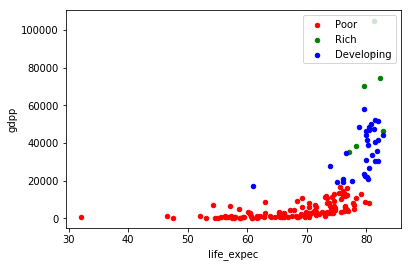

In [702]:
#Visualization on newly created segments - life_expec vs gdp
fig, ax = plt.subplots()
for clust in Segment_Name.values():
    color = segment_color[clust]
    country[country.Segment_Name == clust].plot(kind='scatter',y='gdpp', x='life_expec', label=clust, ax=ax, color=color) 
handles,labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

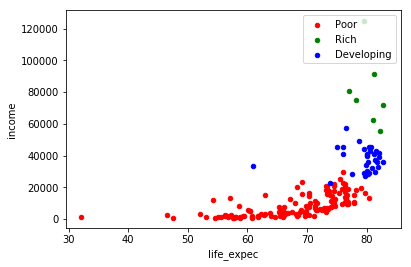

In [703]:
#Visualization on newly created segments - life_expec vs income
fig, ax = plt.subplots()
for clust in Segment_Name.values():
    color = segment_color[clust]
    country[country.Segment_Name == clust].plot(kind='scatter',y='income', x='life_expec', label=clust, ax=ax, color=color) 
handles,labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

In [704]:
#Reviewing top 25 countries which have lower GDP, lower income and low life expectancy based on the predicted components
# and dependant features.
country[['Segment_Name','country','gdpp','life_expec','income','child_mort']].sort_values(by=['gdpp','life_expec','income','child_mort'], ascending=True).head(25)
#HELP NGO can consider these countries to provide relief and shelter.

,Segment_Name,country,gdpp,life_expec,income,child_mort
26,Poor,Burundi,231,57.7,764,93.6
88,Poor,Liberia,327,60.8,700,89.3
37,Poor,"Congo, Dem. Rep.",334,57.5,609,116.0
112,Poor,Niger,348,58.8,814,123.0
132,Poor,Sierra Leone,399,55.0,1220,160.0
93,Poor,Madagascar,413,60.8,1390,62.2
106,Poor,Mozambique,419,54.5,918,101.0
31,Poor,Central African Republic,446,47.5,888,149.0
94,Poor,Malawi,459,53.1,1030,90.5
50,Poor,Eritrea,482,61.7,1420,55.2


In [705]:
#Please refer to the presentation for highlevel summary and conclusion